In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [7]:
data=pd.read_csv("Train_RiskScore.csv")

In [8]:
data

,ID,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...,...
695,695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [9]:
data.drop(["ID"], axis=1, inplace=True)

In [10]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


## EDA 

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,700.0,34.860000,7.997342,20.000000,29.000000,34.000000,40.000000,56.00000
ed,700.0,1.722857,0.928206,1.000000,1.000000,1.000000,2.000000,5.00000
employ,700.0,8.388571,6.658039,0.000000,3.000000,7.000000,12.000000,31.00000
address,700.0,8.278571,6.824877,0.000000,3.000000,7.000000,12.000000,34.00000
income,700.0,45.601429,36.814226,14.000000,24.000000,34.000000,55.000000,446.00000
debtinc,700.0,10.260571,6.827234,0.400000,5.000000,8.600000,14.125000,41.30000
creddebt,700.0,1.553553,2.117197,0.011696,0.369059,0.854869,1.901955,20.56131
othdebt,700.0,3.058209,3.287555,0.045584,1.044178,1.987567,3.923065,27.03360
default,700.0,0.261429,0.439727,0.000000,0.000000,0.000000,1.000000,1.00000


In [13]:
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

In [14]:
Cleaned_data=data.apply(outlier_capping)

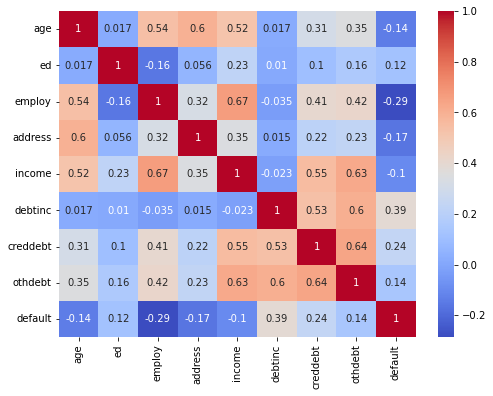

In [18]:
correlation_mat=Cleaned_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_mat, annot=True, cmap="coolwarm")
plt.show()

In [20]:
Cleaned_data["default"].value_counts()

0    517
1    183
Name: default, dtype: int64

In [32]:
y=Cleaned_data["default"]
x=Cleaned_data.drop(["default"], axis=1)

In [42]:
x_train,  x_test,y_train , y_test=train_test_split(x,y, test_size=.25, random_state=9)

In [43]:
log=LogisticRegression(max_iter=10000)
log.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

### Model Evaluation

In [44]:
print(f"Training Score : {log.score(x_train, y_train)}")
print(f"Testing Score : {log.score(x_test, y_test)}")

Training Score : 0.8076190476190476
Testing Score : 0.8114285714285714


In [45]:
pred_train=log.predict(x_train)
pred_test=log.predict(x_test)

In [46]:
pred_train

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [49]:
y_train

342    0
620    0
178    0
123    1
582    0
      ..
56     0
501    1
638    0
348    0
382    1
Name: default, Length: 525, dtype: int64

In [62]:
cnf=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["act_0", "act_1"])
cnf

,Pred_0,Pred_1
act_0,353,33
act_1,68,71


In [63]:
print(metrics.classification_report(y_train, pred_train)) 

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       386
           1       0.68      0.51      0.58       139

    accuracy                           0.81       525
   macro avg       0.76      0.71      0.73       525
weighted avg       0.80      0.81      0.80       525



In [65]:
cnfTest=pd.DataFrame(metrics.confusion_matrix(y_test , pred_test), columns=["Pred_0", "Pred_1"],
                index=["act_0", "act_1"])
cnfTest

,Pred_0,Pred_1
act_0,121,10
act_1,23,21


In [66]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       131
           1       0.68      0.48      0.56        44

    accuracy                           0.81       175
   macro avg       0.76      0.70      0.72       175
weighted avg       0.80      0.81      0.80       175



In [70]:
pd.DataFrame(log.predict_proba(x_train), columns=["Prob_0", "Prob_1"])

,Prob_0,Prob_1
0,0.996121,0.003879
1,0.588338,0.411662
2,0.955957,0.044043
3,0.451167,0.548833
4,0.681965,0.318035
...,...,...
520,0.894002,0.105998
521,0.480223,0.519777
522,0.778908,0.221092
523,0.867427,0.132573


In [71]:
x_train1=x_train.copy()

In [73]:
x_train1["Actual_Default"]=y_train
x_train1["Prob_Default"]=log.predict_proba(x_train)[:, 1]

In [74]:
x_train1

,age,ed,employ,address,income,debtinc,creddebt,othdebt,Actual_Default,Prob_Default
342,39.0,2.0,15.0,19.0,32.0,4.9,0.421792,1.146208,0,0.003879
620,25.0,1.0,1.0,1.0,19.0,6.9,0.190095,1.120905,0,0.411662
178,37.0,1.0,13.0,5.0,24.0,8.9,0.602352,1.533648,0,0.044043
123,31.0,1.0,2.0,4.0,22.0,12.7,1.092454,1.701546,1,0.548833
582,36.0,1.0,9.0,1.0,40.0,9.8,1.975680,1.944320,0,0.318035
...,...,...,...,...,...,...,...,...,...,...
56,35.0,1.0,9.0,1.0,34.0,5.0,0.397800,1.302200,0,0.105998
501,35.0,2.0,3.0,11.0,40.0,17.2,1.802560,5.077440,1,0.519777
638,41.0,2.0,6.0,1.0,19.0,6.3,0.124488,1.072512,0,0.221092
348,29.0,2.0,3.0,8.0,15.0,2.6,0.146640,0.243360,0,0.132573


In [75]:
def profile_decile(X,y,trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred1=trained_model.predict(X_1)
    X_1["Prob_Event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred1
    X_1["Rank"]=pd.qcut(X_1["Prob_Event"], 10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    
    profile=pd.DataFrame(X_1.groupby("Decile") \
                        .apply(lambda x: pd.Series({
        'min_score'   : x["Prob_Event"].min(),
        'max_score'   : x["Prob_Event"].max(),
        'Event'       : x["Y_actual"].sum(),
        'Non_event'   : x["Y_actual"].count()-x["Y_actual"].sum(),
        'Total'       : x["Y_actual"].count() })))
    return profile

In [83]:
train_profile=profile_decile(x_train, y_train, log)
train_profile.to_excel("train_profile1.xlsx" )

In [79]:
test_prof=profile_decile(x_test, y_test, log)
test_prof.to_excel("test_profile.xlsx") 

In [84]:
newtrain_pred=np.where(log.predict_proba(x_train)[:,1]>0.258825623540294, 1,0)

In [85]:
cnfNew=pd.DataFrame(metrics.confusion_matrix(y_train , newtrain_pred), columns=["Pred_0", "Pred_1"],
                index=["act_0", "act_1"])
cnfNew

,Pred_0,Pred_1
act_0,288,98
act_1,27,112


In [86]:
print(metrics.classification_report(y_train, newtrain_pred))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       386
           1       0.53      0.81      0.64       139

    accuracy                           0.76       525
   macro avg       0.72      0.78      0.73       525
weighted avg       0.81      0.76      0.77       525



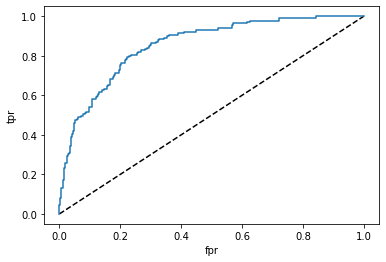

In [87]:
# Reciever Operating Characterestics 

probs=log.predict_proba(x_train)[:,1]

fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='logistic')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [88]:
metrics.roc_auc_score(y_train,probs) # AUC Area Under the Curve 

0.8551272971260298

In [93]:
new=pd.read_excel("Test_RiskScore.xlsx")

In [97]:
new

,ID,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,700,32,4,7,6.0,73,1.40,3.00,2.34
1,701,45,4,15,15.0,120,4.78,4.67,5.78
2,702,32,4,7,6.0,73,10.34,3.00,2.34
3,703,24,3,2,2.5,25,32.00,8.00,0.00
4,704,32,1,7,5.0,105,12.00,9.00,3.00


In [98]:
new.drop(columns=["ID"],inplace=True)

In [99]:
new

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,32,4,7,6.0,73,1.40,3.00,2.34
1,45,4,15,15.0,120,4.78,4.67,5.78
2,32,4,7,6.0,73,10.34,3.00,2.34
3,24,3,2,2.5,25,32.00,8.00,0.00
4,32,1,7,5.0,105,12.00,9.00,3.00


In [101]:
log.predict_proba(new)[:,1]

array([0.27687626, 0.08386748, 0.41353477, 0.99723622, 0.97373057])